# <center>OLS Linear Regression</center>

## Mục lục
- [Chuẩn bị](#c1)
- [Hồi quy tuyến tính sử dụng phương pháp bình phương tối thiểu (OLS Linear Regression)](#c2)
- [Phương pháp đo lường độ lỗi (sai số)](#c3)

## Chuẩn bị <a class="anchor" id="c1"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Dữ liệu

Sử dụng dữ liệu từ Bài 7 trong Bài tập 4 (Homework 04).
Một vật rơi theo phương thẳng đứng theo phương trình sau:

$$s = s_0 + v_0t + \frac{1}{2}gt^2$$

Người ta thực hiện thí nghiệm thu được kết quả như sau:

| t (x) | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 |
|---|---|---|---|---|---|
| s (y) | -0.18 | 0.31 | 1.03 | 2.48 | 3.73 |

### Trực quan hóa

In [3]:
x = np.array([2400,2650,2350,4950,3100,2500,5106,3100,2900]).reshape(-1, 1)
y = np.array([41200,50100,52000,66000,44500,37700,73500,37500,56700]).reshape(-1, 1)
x, y

(array([[2400],
        [2650],
        [2350],
        [4950],
        [3100],
        [2500],
        [5106],
        [3100],
        [2900]]),
 array([[41200],
        [50100],
        [52000],
        [66000],
        [44500],
        [37700],
        [73500],
        [37500],
        [56700]]))

In [4]:
def plot_data(x, y):
    plt.scatter(x, y, color='b', marker='o')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.grid()
    plt.show()

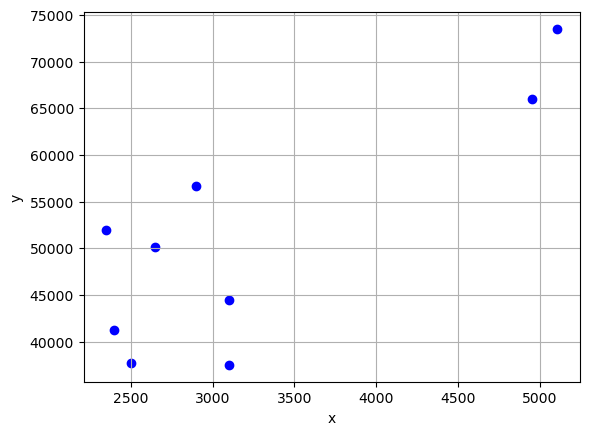

In [5]:
plot_data(x, y)

## Hồi quy tuyến tính sử dụng phương pháp bình phương tối thiểu (OLS Linear Regression) <a class="anchor" id="c2"></a>

Ta cần tìm nghiệm của phương trình $Ax \approx b$

Xét ma trận **A** có kích thước *m x n* (*m* > *n*) và vector (cột) **b** có kích thước *m*. Ta có chuẩn Euclidean của bình phương phần dư $r$ của $Ax - b$ như sau:

**$$r = ||Ax - b||^{2} \ \ \ \  (1) $$**


Để giải được nghiệm $x$ cho hệ phương trình, ta thực hiện tối thiểu hóa công thức (1) được nghiệm $x$ của hệ phương trình được tính như sau:

$$x = (A^T A)^{-1} A^T b$$

*Note: $(A^T A)^{-1} A^T$ là ma trận giả nghịch đảo của A*

Bài thực hành này sử dụng tên gọi khác cho đầu vào, đầu ra và tham số trong hồi quy tuyến tính như sau:
- $A \to X$
- $b \to y$
- $x \to w$ ($w$: weight)

$Ax \approx b \to Xw \approx y$ hay $ Xw = y$ ($y$ được gọi là đường hồi quy (regression line))

### Tiền xử lý

Tiền xử lý dữ liệu theo phương trình (1).

In [6]:
def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    return X, y

In [7]:
x, y

(array([[2400],
        [2650],
        [2350],
        [4950],
        [3100],
        [2500],
        [5106],
        [3100],
        [2900]]),
 array([[41200],
        [50100],
        [52000],
        [66000],
        [44500],
        [37700],
        [73500],
        [37500],
        [56700]]))

In [8]:
X, y = preprocess(x, y)
X, y

(array([[1.000e+00, 2.400e+03],
        [1.000e+00, 2.650e+03],
        [1.000e+00, 2.350e+03],
        [1.000e+00, 4.950e+03],
        [1.000e+00, 3.100e+03],
        [1.000e+00, 2.500e+03],
        [1.000e+00, 5.106e+03],
        [1.000e+00, 3.100e+03],
        [1.000e+00, 2.900e+03]]),
 array([[41200],
        [50100],
        [52000],
        [66000],
        [44500],
        [37700],
        [73500],
        [37500],
        [56700]]))

### OLS Linear Regression

In [9]:
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

In [10]:
lr = OLSLinearRegression().fit(X, y)

In [11]:
lr.get_params()
result =lr.get_params()

### Trực quan hóa

In [12]:
def plot_regression(lr, x, y):
    # Plot data
    _x = 5000
    plt.scatter(x, y, color='b', marker='o')
    plt.scatter(_x, result[0] + result[1]*_x, color= 'black', marker='o')
    # Plot regression line
    x_para = np.linspace(2000, 5500, 1000).reshape(-1, 1)
    X_para = np.hstack((np.ones((x_para.shape[0], 1)), x_para))
    y_pred = lr.predict(X_para)
    plt.plot(x_para, y_pred, color='r')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.grid()
    plt.show()

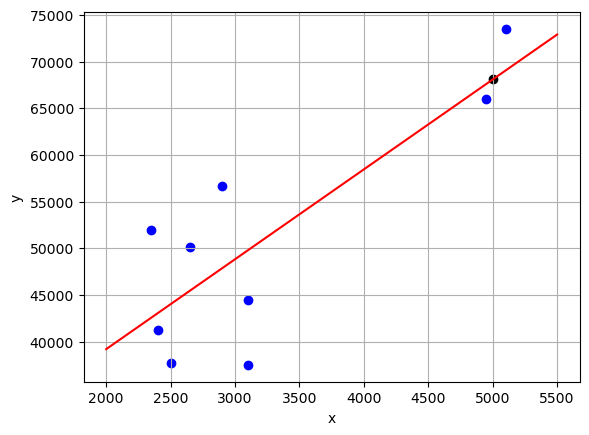

In [13]:
plot_regression(lr, x, y)

Ta có thể dự đoán ở mức giá trị 5000 đô là chấm đen trên hình, vì điểm $(x,y)$ của chấm đen vẫn nằm trong khoảng so với điểm xa nhất của đường hồi quy tuyến tính

$\rightarrow$ Đây là **điểm nội suy (interpolation)** 